# MODEL SELECTION

## TRAINSET / TESTSET

> Ne jamais évaluer un modèle sur les données d'entraînement ! <br>
Il faut donc diviser un data set en train set (80% des données) et un test set (20% des données). <br>
Pour cela on utilise <span style="color:red">model_selection.train_test_split</span>.


In [43]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

In [8]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

Text(0.5, 1.0, 'Train test')

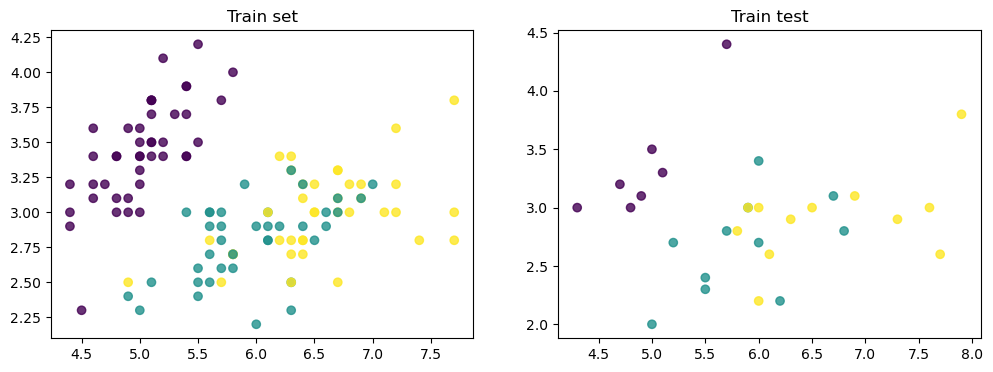

In [14]:
plt.figure(figsize=(12,4))
plt.subplot(121) # Cette ligne crée le premier sous-graphique, 
#avec une disposition en grille de 1 ligne et 2 colonnes, 
# et sélectionne le premier emplacement de la grille 
plt.scatter(X_train[:,0],X_train[:,1], c = y_train, alpha =0.8)
plt.title('Train set')
plt.subplot(122) #disposition en grille de 1 ligne et 2 colonnes, 
#mais cette fois en sélectionnant le deuxième emplacement de la grille.
plt.scatter(X_test[:,0],X_test[:,1], c = y_test, alpha =0.8)
plt.title('Train test')

In [17]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)
print("Train score :",model.score(X_test,y_test))

Train score : 0.9333333333333333


## Validation set
> Réglons les hyper paramètres du modèle pour l'améliorer <br>
Il nous faut pour cela créer un validation set ! 

### Cross Validation
> Découper le test set en n parties. Faire des test sur n-1 parties et évaluer le modèle sur la n-ème. Répéter cela n fois. Faire la moyenne des scores. <br>
Pour cela utiliser <span style="color:red">cross_val_score</span>

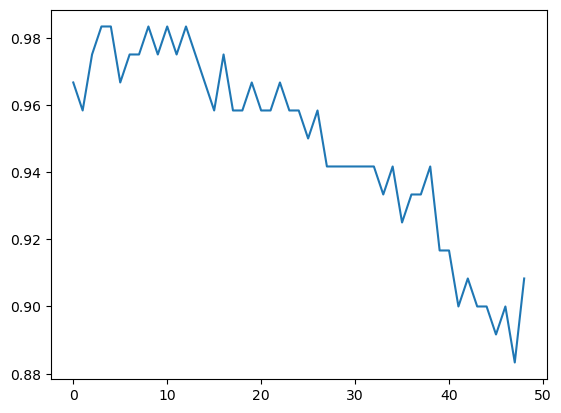

In [23]:
val_score = []
for k in range(1,50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5, scoring = 'accuracy').mean()
    val_score.append(score)

plt.plot(val_score)

# On découpe en 5 parties (cv = 5)
# Choix de la métrique associée à notre estimateur (scoring)

### Validation Curve
<span style= 'color:orange'> validation_curve(model, X_train, y_train, 'hyperparamètre, valeurs, cv=5) <span>

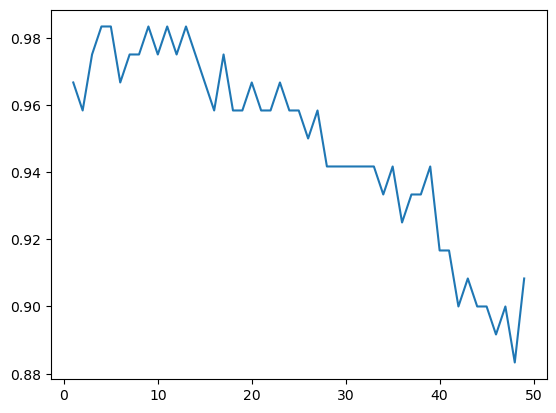

In [29]:
model = KNeighborsClassifier()

k =np.arange(1,50)

train_score, val_score = validation_curve(model, X_train, y_train, param_name='n_neighbors', param_range=k, cv=5)

plt.plot(k,val_score.mean(axis=1))

### GridSearchCV
> Permet de trouver le modèle avec les meilleurs hyperparamètres 

In [39]:
#Dictionnaire des différents hyperparamètres 

param_grid = {'n_neighbors':np.arange(1,50),
              'metric':['euclidean','manhattan']}

grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
grid.fit(X_train,y_train)
grid.best_score_ , grid.best_params_
model = grid.best_estimator_

In [40]:
model.score(X_test,y_test)

0.9666666666666667

On utilise la Confusion Matrix pour évaluer la qualité d'un modèle de classification : 

In [42]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, model.predict(X_test))

# Les 7 fleurs de la classe 1 ont bien été classifiées 
# Les 11 fleurs de la classe 2 ont pas toutes été bien classifiées (1 en classe 3)
# Les 12 fleurs de la classe 3 ont été bien rangées dans la classe 3

array([[ 7,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 12]])

### Learning_curve (courbes d'apprentissage)
> Qualité du modèle en fonction du nombre d'informations que l'on fournit 

[19 27 36 44 53 61 70 78 87 96]


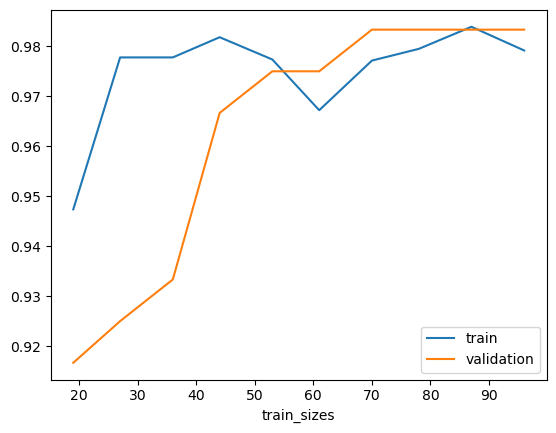

In [52]:
model = KNeighborsClassifier()
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.2, 1.0 ,10), cv=5) 

print(N)
plt.plot(N,train_score.mean(axis=1), label = 'train')
plt.plot(N,val_score.mean(axis=1), label = 'validation')
plt.xlabel('train_sizes')
plt.legend()